# Rainfall Weather Forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

1. Problem Statement:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score,plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
# checking null value
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
print(df['WindGustDir'].unique())
print(df['WindDir9am'].unique())
print(df['WindDir3pm'].unique())
print(df['RainToday'].unique())
print(df['Location'].unique())
print(df['RainTomorrow'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
['No' 'Yes' nan]
['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
['No' 'Yes' nan]


In [6]:
encoders = dict()

for col_name in df.columns:
    series = df[col_name]
    label_encoder = LabelEncoder()
    df[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

In [7]:
df["Day"] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.day
df["Month"] = pd.to_datetime(df["Date"], format = "%Y/%m/%d").dt.month
df.drop(["Date"], axis = 1, inplace = True)

In [8]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month
0,1,149.0,134.0,5.0,NaN,NaN,13.0,20.0,13.0,14.0,...,90.0,103.0,8.0,NaN,145.0,134.0,0.0,0.0,1,1
1,1,89.0,156.0,0.0,NaN,NaN,14.0,20.0,6.0,15.0,...,119.0,110.0,NaN,NaN,148.0,159.0,0.0,0.0,1,1
2,1,144.0,162.0,0.0,NaN,NaN,15.0,21.0,13.0,15.0,...,89.0,119.0,NaN,2.0,186.0,148.0,0.0,0.0,1,1
3,1,107.0,185.0,0.0,NaN,NaN,4.0,9.0,9.0,0.0,...,189.0,160.0,NaN,NaN,157.0,181.0,0.0,0.0,1,1
4,1,190.0,228.0,8.0,NaN,NaN,13.0,18.0,1.0,7.0,...,121.0,92.0,7.0,8.0,154.0,213.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,43.0,139.0,0.0,NaN,NaN,0.0,13.0,9.0,1.0,...,259.0,235.0,NaN,NaN,77.0,140.0,0.0,0.0,1,1
8421,9,51.0,158.0,0.0,NaN,NaN,6.0,8.0,9.0,3.0,...,248.0,223.0,NaN,NaN,85.0,161.0,0.0,0.0,1,1
8422,9,69.0,174.0,0.0,NaN,NaN,3.0,16.0,9.0,14.0,...,223.0,200.0,NaN,NaN,101.0,177.0,0.0,0.0,1,1
8423,9,93.0,175.0,0.0,NaN,NaN,9.0,11.0,10.0,3.0,...,207.0,197.0,3.0,2.0,127.0,176.0,0.0,0.0,1,1


In [9]:
#Fill NaNs with mean using simple imputer
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month
0,1.0,149.0,134.0,5.0,21.0,0.0,13.0,20.0,13.0,14.0,...,90.0,103.0,8.0,7.0,145.0,134.0,0.0,0.0,1.0,1.0
1,1.0,89.0,156.0,0.0,21.0,0.0,14.0,20.0,6.0,15.0,...,119.0,110.0,7.0,7.0,148.0,159.0,0.0,0.0,1.0,1.0
2,1.0,144.0,162.0,0.0,21.0,0.0,15.0,21.0,13.0,15.0,...,89.0,119.0,7.0,2.0,186.0,148.0,0.0,0.0,1.0,1.0
3,1.0,107.0,185.0,0.0,21.0,0.0,4.0,9.0,9.0,0.0,...,189.0,160.0,7.0,7.0,157.0,181.0,0.0,0.0,1.0,1.0
4,1.0,190.0,228.0,8.0,21.0,0.0,13.0,18.0,1.0,7.0,...,121.0,92.0,7.0,8.0,154.0,213.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,43.0,139.0,0.0,21.0,0.0,0.0,13.0,9.0,1.0,...,259.0,235.0,7.0,7.0,77.0,140.0,0.0,0.0,1.0,1.0
8421,9.0,51.0,158.0,0.0,21.0,0.0,6.0,8.0,9.0,3.0,...,248.0,223.0,7.0,7.0,85.0,161.0,0.0,0.0,1.0,1.0
8422,9.0,69.0,174.0,0.0,21.0,0.0,3.0,16.0,9.0,14.0,...,223.0,200.0,7.0,7.0,101.0,177.0,0.0,0.0,1.0,1.0
8423,9.0,93.0,175.0,0.0,21.0,0.0,9.0,11.0,10.0,3.0,...,207.0,197.0,3.0,2.0,127.0,176.0,0.0,0.0,1.0,1.0


In [10]:
#Check the statistical data
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.0,8425.0
mean,5.793591,146.814481,143.197626,14.248902,24.598220,40.140415,7.217804,17.616617,7.267418,7.810445,...,185.074896,188.462789,5.265875,5.230742,153.396083,140.014125,0.236202,0.236320,1.0,1.0
std,3.162654,53.746140,61.051717,35.731106,13.996052,47.442972,4.702616,7.430955,4.588045,4.430162,...,63.039924,62.185403,2.667166,2.564122,56.006350,59.376798,0.424773,0.424846,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,3.000000,108.000000,97.000000,0.000000,21.000000,0.000000,3.000000,13.000000,3.000000,4.000000,...,153.000000,146.000000,3.000000,3.000000,114.000000,97.000000,0.000000,0.000000,1.0,1.0
50%,6.000000,147.000000,137.000000,0.000000,21.000000,2.000000,7.000000,17.000000,7.000000,8.000000,...,174.000000,202.000000,7.000000,7.000000,153.000000,134.000000,0.000000,0.000000,1.0,1.0
75%,8.000000,188.000000,185.000000,7.000000,27.000000,89.000000,12.000000,22.000000,12.000000,11.000000,...,226.000000,220.000000,7.000000,7.000000,195.000000,179.000000,0.000000,0.000000,1.0,1.0
max,11.000000,284.000000,330.000000,249.000000,115.000000,139.000000,15.000000,51.000000,15.000000,15.000000,...,383.000000,373.000000,8.000000,8.000000,303.000000,327.000000,1.000000,1.000000,1.0,1.0


Looks like Rainfall feature has outliers

In [11]:
df.shape

(8425, 24)

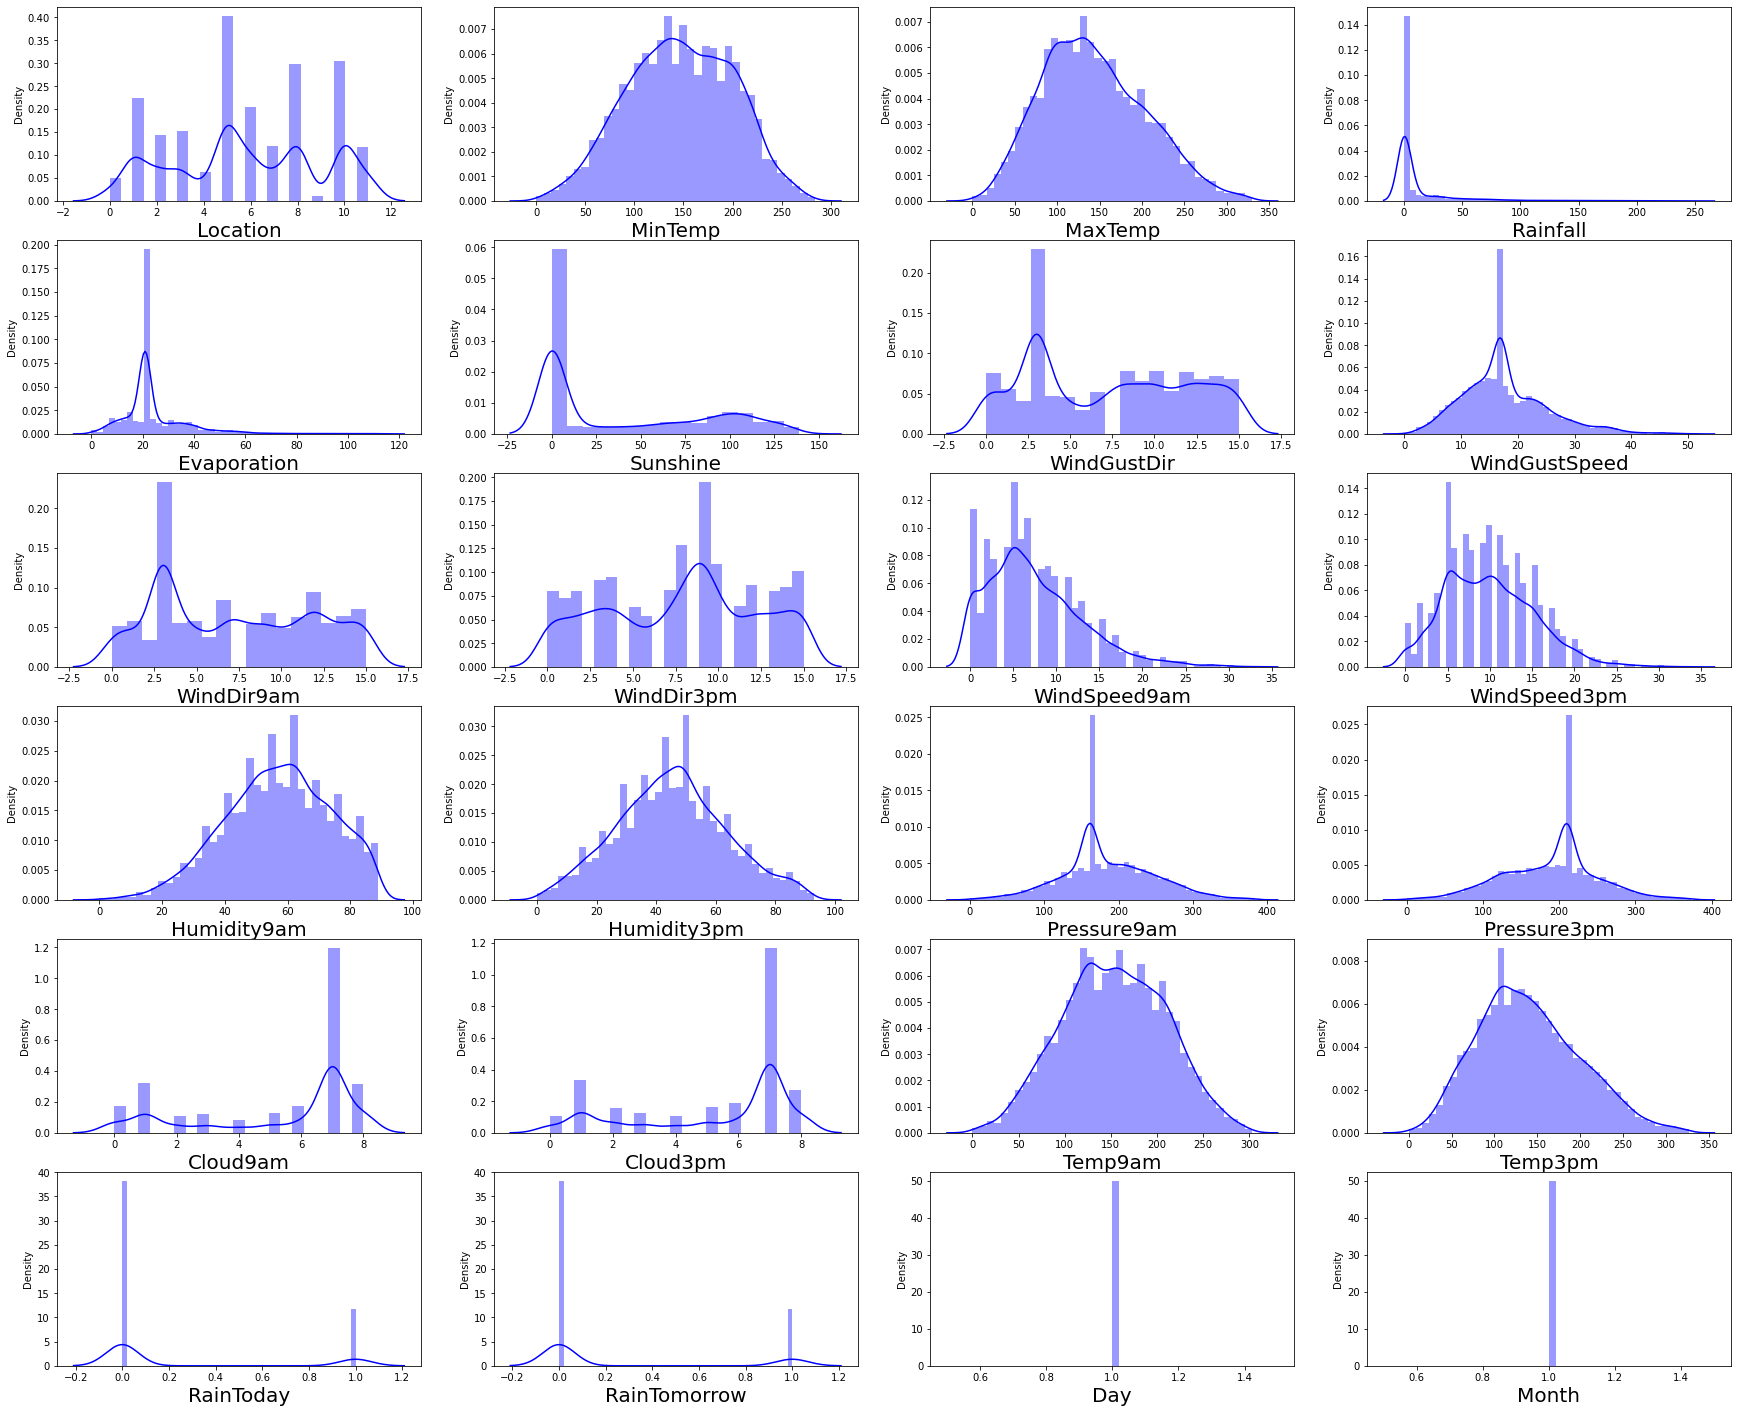

In [12]:
#Visualize the data distribution
plt.figure(figsize = (30,25))
n = 1

for column in df:
    if n <=24:
        ax = plt.subplot(6,4,n)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

Looks like Rainfall, Evaporation and Sunshine features are not normally distributed

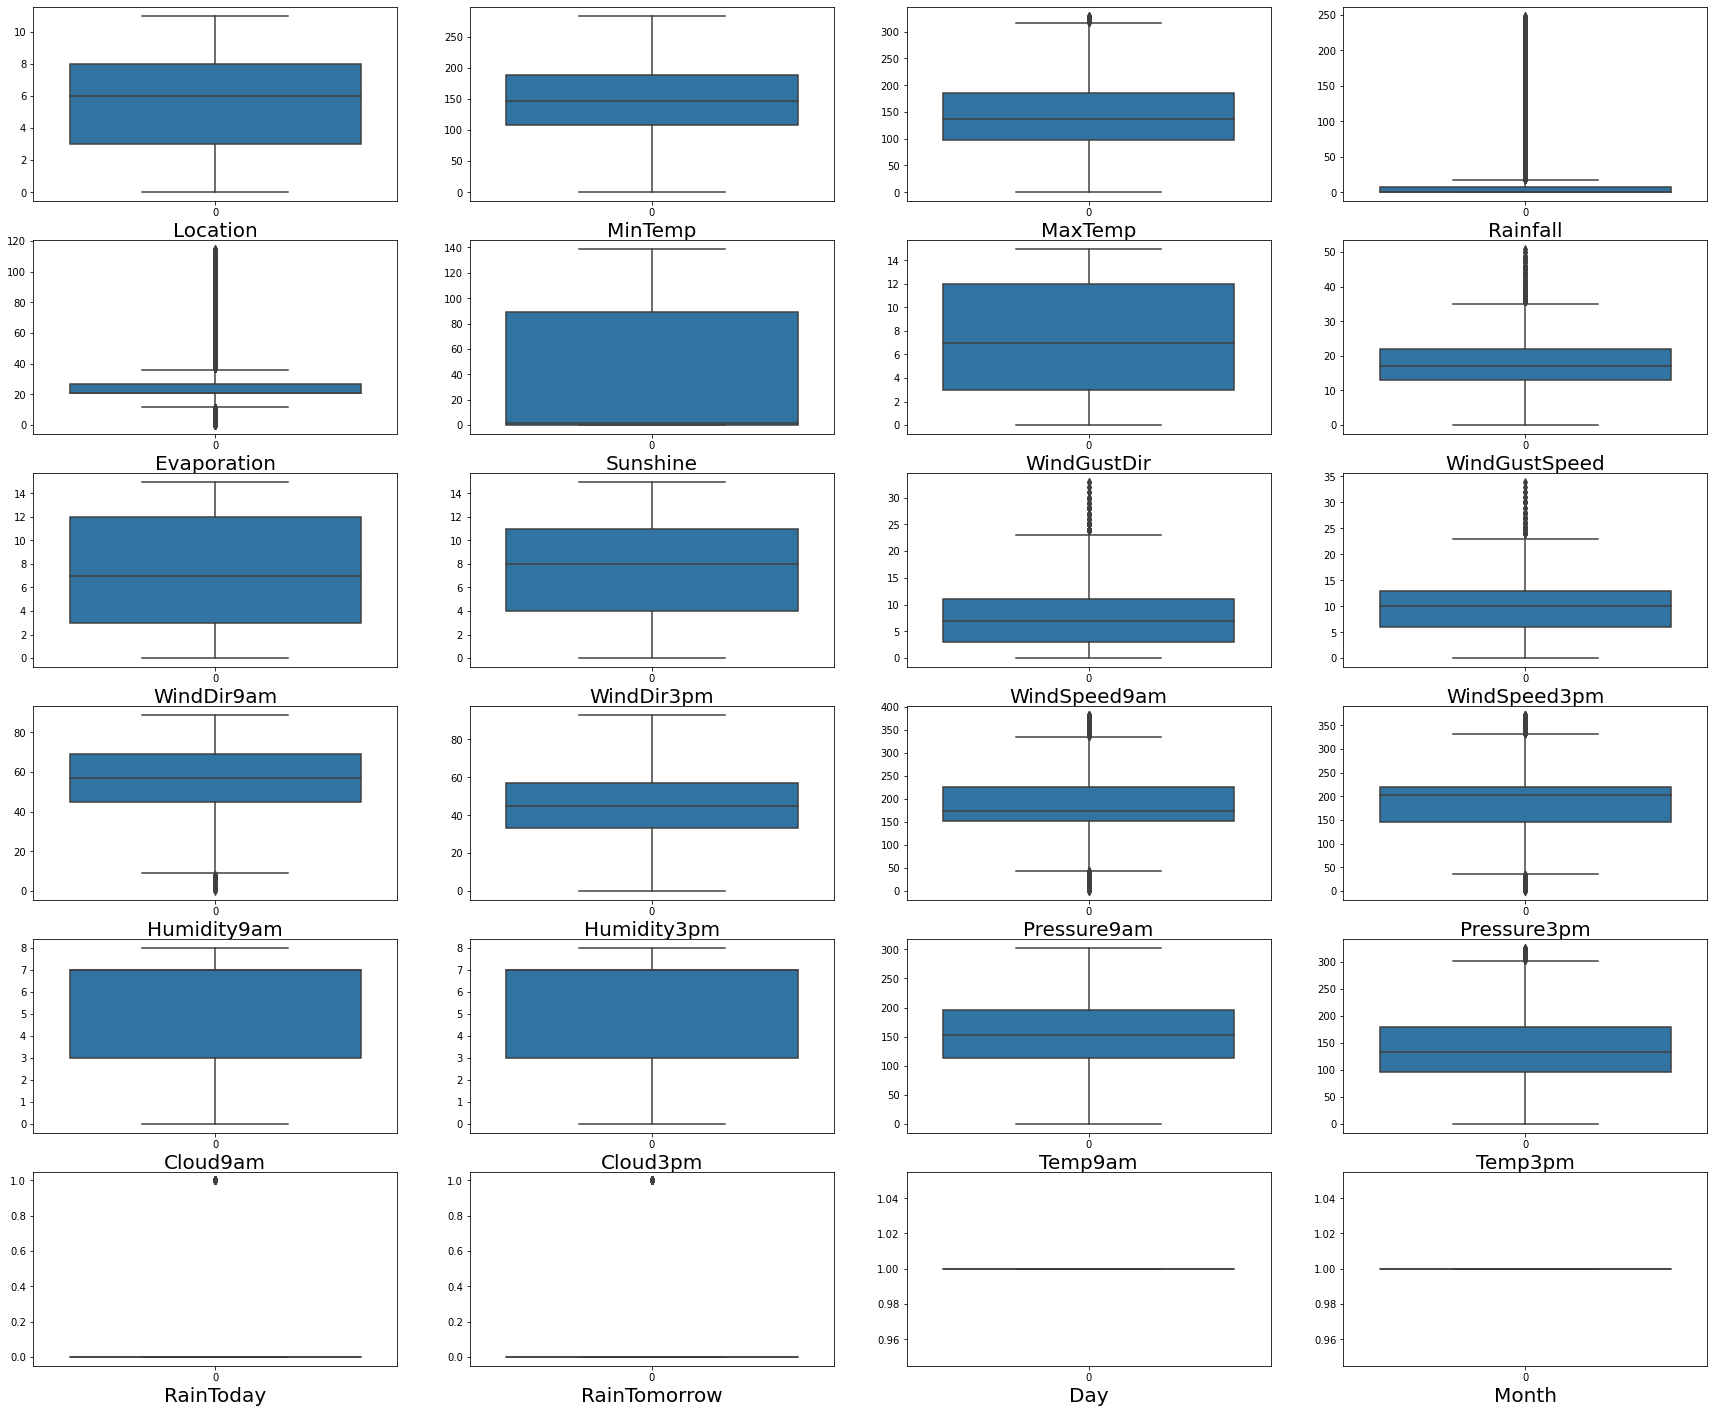

In [13]:
#Let's visualize the data using boxplot
plt.figure(figsize=(30,25))
n=1
for column in df:
    if n<=24:
        ax=plt.subplot(6,4,n)
        sns.boxplot(data=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    n+=1
plt.show()

Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am and Pressure3pm features has outliers,let me remove them using zscore technique

In [14]:
from scipy.stats import zscore
#Features having outliers
features=df[['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm']]
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month
0,1.0,149.0,134.0,5.0,21.0,0.0,13.0,20.0,13.0,14.0,...,90.0,103.0,8.0,7.0,145.0,134.0,0.0,0.0,1.0,1.0
1,1.0,89.0,156.0,0.0,21.0,0.0,14.0,20.0,6.0,15.0,...,119.0,110.0,7.0,7.0,148.0,159.0,0.0,0.0,1.0,1.0
2,1.0,144.0,162.0,0.0,21.0,0.0,15.0,21.0,13.0,15.0,...,89.0,119.0,7.0,2.0,186.0,148.0,0.0,0.0,1.0,1.0
3,1.0,107.0,185.0,0.0,21.0,0.0,4.0,9.0,9.0,0.0,...,189.0,160.0,7.0,7.0,157.0,181.0,0.0,0.0,1.0,1.0
4,1.0,190.0,228.0,8.0,21.0,0.0,13.0,18.0,1.0,7.0,...,121.0,92.0,7.0,8.0,154.0,213.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,43.0,139.0,0.0,21.0,0.0,0.0,13.0,9.0,1.0,...,259.0,235.0,7.0,7.0,77.0,140.0,0.0,0.0,1.0,1.0
8421,9.0,51.0,158.0,0.0,21.0,0.0,6.0,8.0,9.0,3.0,...,248.0,223.0,7.0,7.0,85.0,161.0,0.0,0.0,1.0,1.0
8422,9.0,69.0,174.0,0.0,21.0,0.0,3.0,16.0,9.0,14.0,...,223.0,200.0,7.0,7.0,101.0,177.0,0.0,0.0,1.0,1.0
8423,9.0,93.0,175.0,0.0,21.0,0.0,9.0,11.0,10.0,3.0,...,207.0,197.0,3.0,2.0,127.0,176.0,0.0,0.0,1.0,1.0


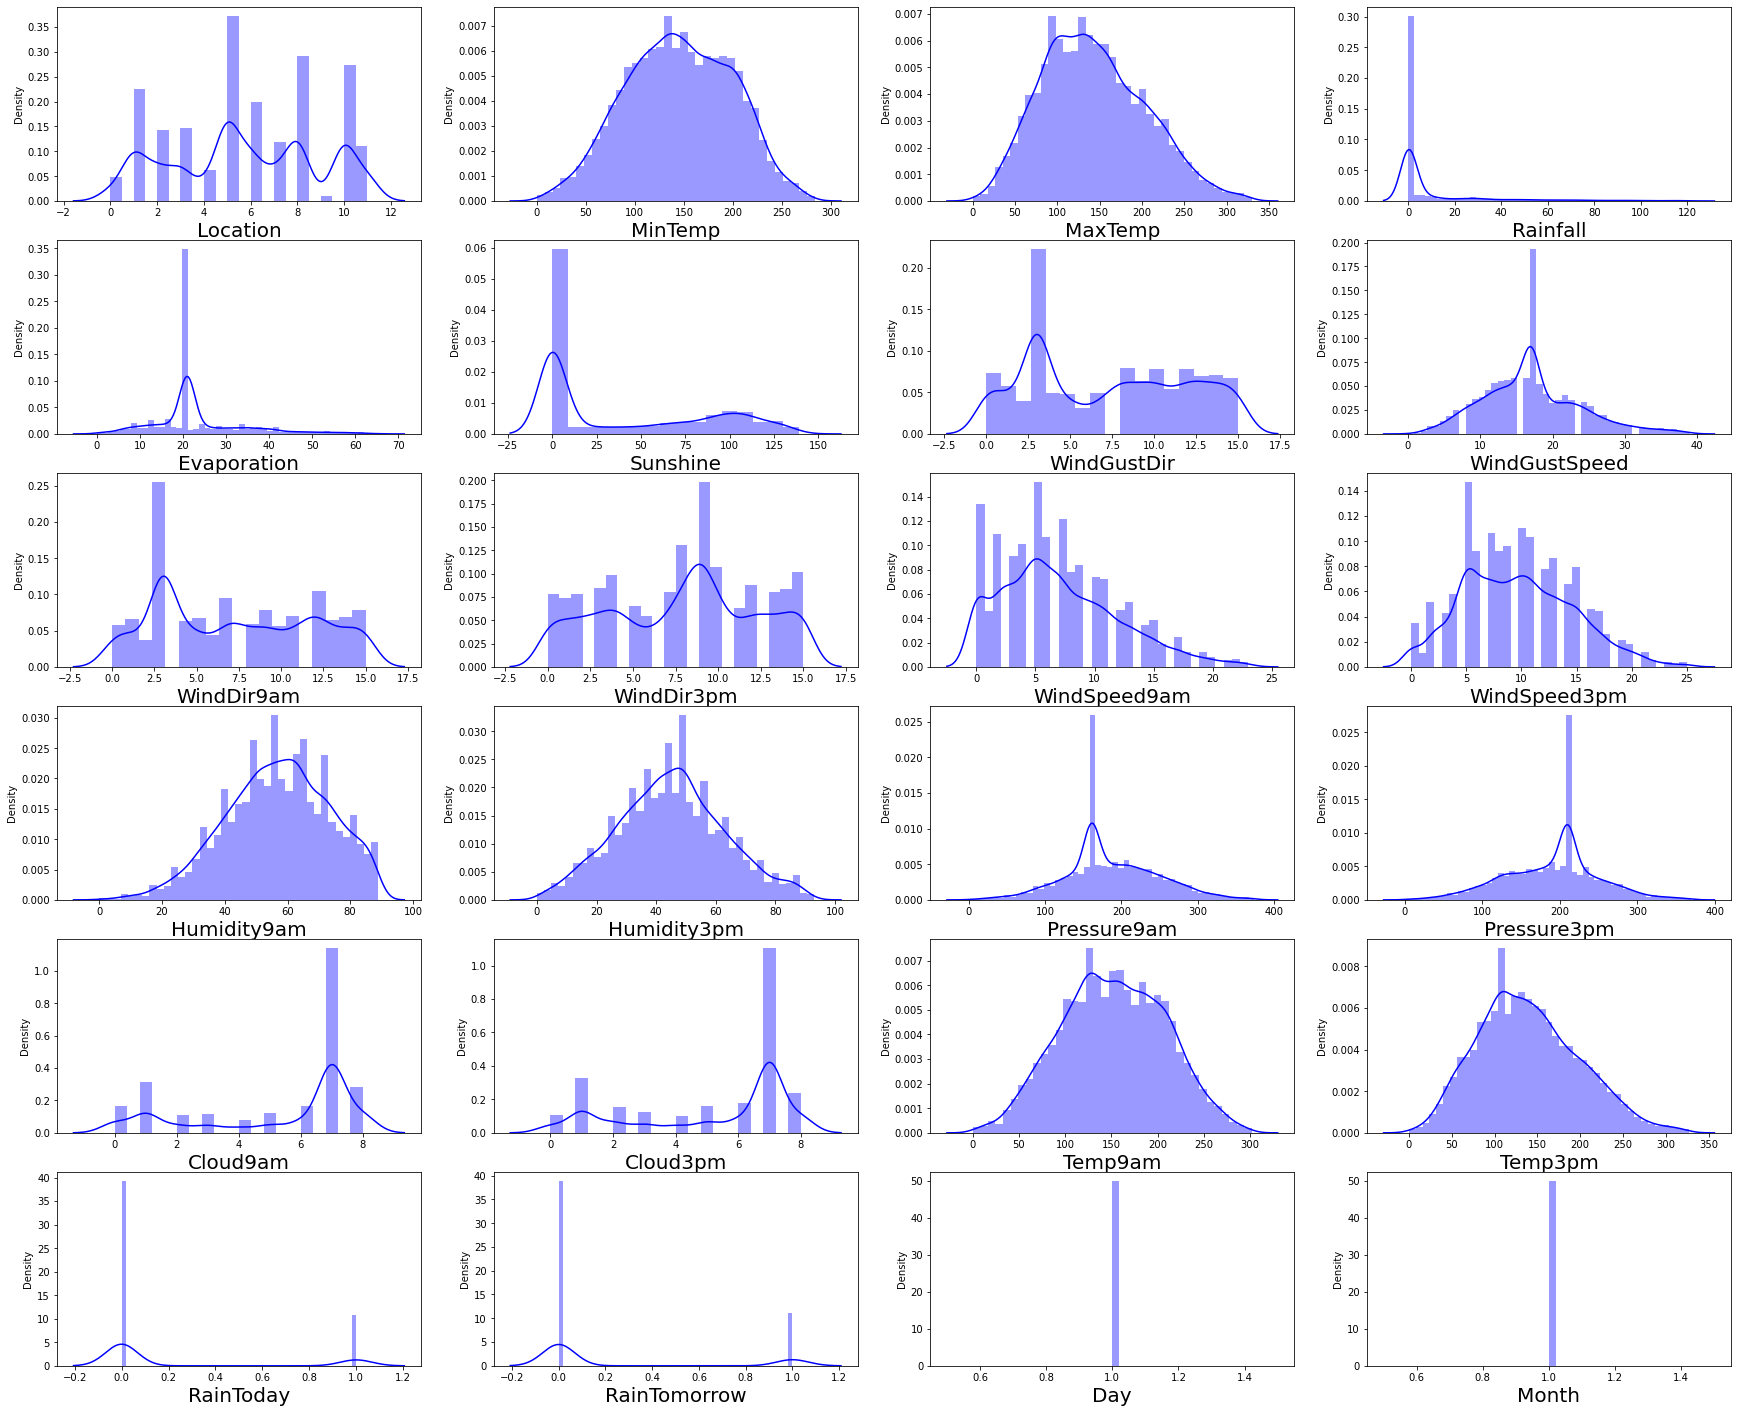

In [15]:
#Visualize the data distribution after outlier removal
plt.figure(figsize = (30,25))
n = 1

for column in df_new:
    if n <=24:
        ax = plt.subplot(6,4,n)
        sns.distplot(df_new[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

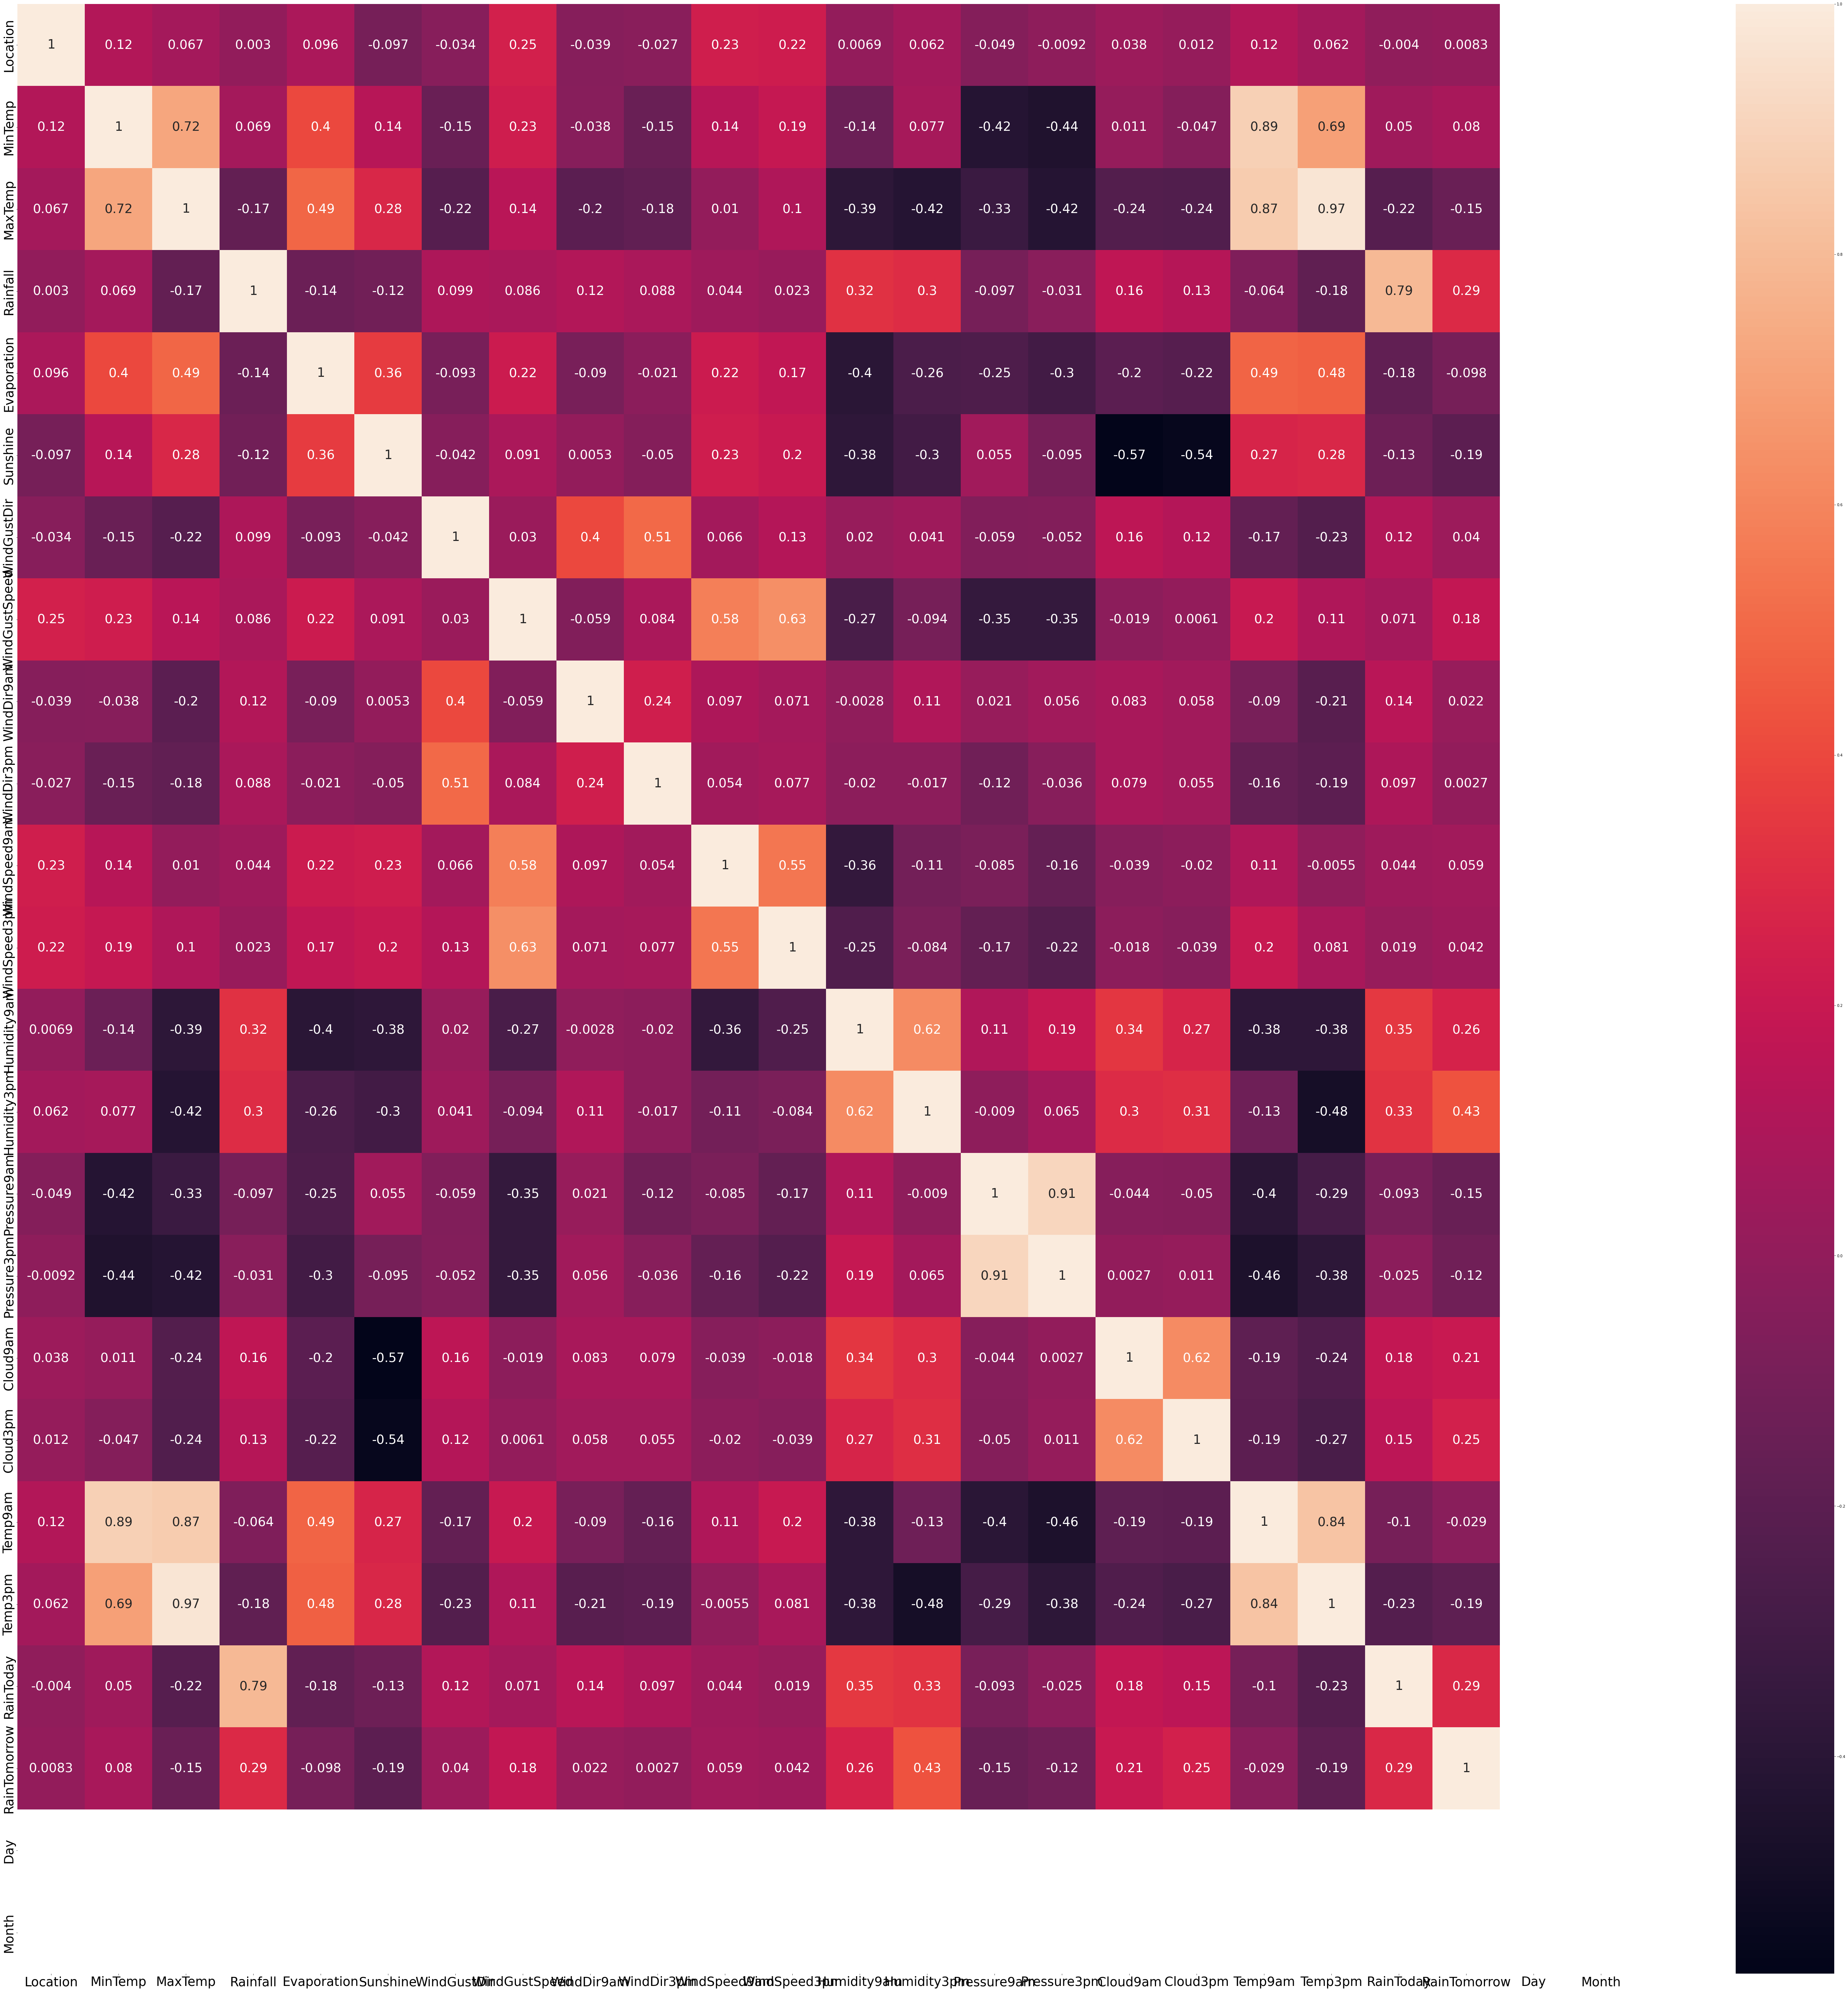

In [16]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df_new.corr()
plt.figure(figsize=(100,100))
res = sns.heatmap(df_corr,annot=True,annot_kws={'size':35})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 35)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 35)
plt.show()

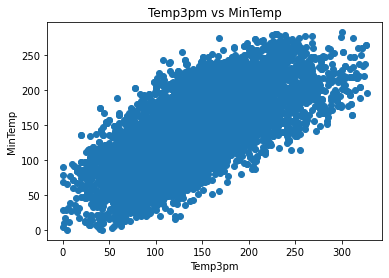

In [17]:
# Check if they are really related
plt.scatter(df_new['Temp3pm'],df_new['MinTemp'])
plt.xlabel('Temp3pm')
plt.ylabel('MinTemp')
plt.title('Temp3pm vs MinTemp')
plt.show()

From the above visualization i decided to drop Temp3pm as it is highly correlated to MinTemp and less correlated to targets

In [18]:
df = df_new.drop('Temp3pm',axis=1)

In [19]:
df.shape

(7825, 23)

In [20]:
#Checking dataloss
Dataloss = (((8425-7825)/8425)*100)
print(Dataloss)

7.121661721068249


There are 2 targets Rainfall which is continuous variable and RainTomorrow which is binary categorical variable.<br>
Let me predict Rainfall first

In [21]:
x = df.drop(['Rainfall','RainTomorrow'],axis=1)
y = df.Rainfall

In [22]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [23]:
#Split the data into 2 parts using Hold Out method
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=59)

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred_train = lr.predict(x_train)
print('How well the model understood the training data:',r2_score(y_train,lr_pred_train))
lr_pred_test=lr.predict(x_test)
print('Accuracy_score:',r2_score(y_test,lr_pred_test))
print('mse:',metrics.mean_squared_error(y_test,lr_pred_test))
print('mae:',metrics.mean_absolute_error(y_test,lr_pred_test))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred_test)))

How well the model understood the training data: 0.634504960415375
Accuracy_score: 0.6314066449344489
mse: 146.98403093325894
mae: 5.813873268803943
rmse: 12.123697081883023


In [25]:
from sklearn.tree import DecisionTreeRegressor
# DT model instantiation with default parameters
dt = DecisionTreeRegressor()
# Train the model
dt.fit(x_train,y_train)
dt_pred_train = dt.predict(x_train)
print('How well the model understood the training data:',r2_score(y_train,dt_pred_train))
dt_pred = dt.predict(x_test)
print('Accuracy:',r2_score(y_test,dt_pred))
print('mse:',metrics.mean_squared_error(y_test,dt_pred))
print('mae:',metrics.mean_absolute_error(y_test,dt_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

How well the model understood the training data: 1.0
Accuracy: 0.43093943033693227
mse: 226.92437404190088
mae: 4.941747572815534
rmse: 15.064009228684801


In [26]:
from sklearn.ensemble import RandomForestRegressor
# DT model instantiation with default parameters
rf = RandomForestRegressor()
# Train the model
rf.fit(x_train,y_train)
rf_pred_train = rf.predict(x_train)
print('How well the model understood the training data:',r2_score(y_train,rf_pred_train))
rf_pred = dt.predict(x_test)
print('Accuracy:',r2_score(y_test,rf_pred))
print('mse:',metrics.mean_squared_error(y_test,rf_pred))
print('mae:',metrics.mean_absolute_error(y_test,rf_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

How well the model understood the training data: 0.9602256878898855
Accuracy: 0.43093943033693227
mse: 226.92437404190088
mae: 4.941747572815534
rmse: 15.064009228684801


In [27]:
from sklearn.ensemble import AdaBoostRegressor
# DT model instantiation with default parameters
ab = AdaBoostRegressor()
# Train the model
ab.fit(x_train,y_train)
ab_pred_train = ab.predict(x_train)
print('How well the model understood the training data:',r2_score(y_train,ab_pred_train))
ab_pred = ab.predict(x_test)
print('Accuracy:',r2_score(y_test,ab_pred))
print('mse:',metrics.mean_squared_error(y_test,ab_pred))
print('mae:',metrics.mean_absolute_error(y_test,ab_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,ab_pred)))

How well the model understood the training data: 0.6237674202337196
Accuracy: 0.5802774231269141
mse: 167.37283886067166
mae: 5.637722290569029
rmse: 12.937265509398486


So the best model for predicting Rainfall is LinearRegression

In [28]:
filename = 'Rainfall_Prediction_model.pickle'
pickle.dump(lr,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_pred = loaded_model.predict(x_test)
data = pd.DataFrame({"Actual":y_test,"Predicted":loaded_pred})
data

,Actual,Predicted
2468,2.0,2.088516
4666,0.0,1.800924
2025,0.0,-0.484926
5879,0.0,-2.574947
4160,0.0,2.213135
...,...,...
870,0.0,-0.763058
3464,40.0,42.701405
4573,38.0,41.518802
2904,0.0,0.194538


Now let me predict one more target RainTomorrow

In [29]:
x = df.drop(['Rainfall','RainTomorrow'],axis=1)
y = df.RainTomorrow

In [30]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [31]:
#Split the data into 2 parts using Hold Out method
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=59)

In [32]:
# Model instantiation with default parameters
lr = LogisticRegression()
# Train the model
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1532
         1.0       0.67      0.43      0.53       425

    accuracy                           0.83      1957
   macro avg       0.76      0.69      0.71      1957
weighted avg       0.82      0.83      0.82      1957



In [33]:
# model instantiation with default parameters
dtc = DecisionTreeClassifier()
# Train the model
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1532
         1.0       0.62      0.67      0.65       425

    accuracy                           0.84      1957
   macro avg       0.77      0.78      0.77      1957
weighted avg       0.85      0.84      0.84      1957



In [34]:
# Model instantiation with default parameters
knn = KNeighborsClassifier()
# Train the model
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1532
         1.0       0.68      0.46      0.55       425

    accuracy                           0.84      1957
   macro avg       0.77      0.70      0.72      1957
weighted avg       0.82      0.84      0.82      1957



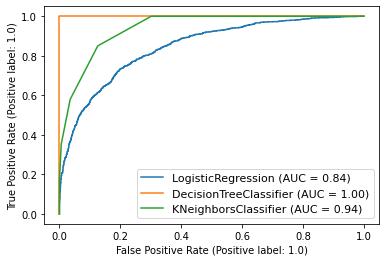

In [35]:
#let me plot roc curve to chose the best model
disp = plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dtc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [36]:
for i in range(2,9):
    print(cross_val_score(dtc,x_scaled,y,cv=i).mean())

0.7367457173064249
0.7128528959453707
0.741087718775765
0.7842811501597444
0.7394239357826199
0.7831343356316811
0.8186713937472192


The DecisionTreeClassifier looks overfitted model

We try to use ensemble models to check if our performance improves using ensemble models

In [37]:
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [38]:
for i in [rf,ab,gb]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i)
    print("Classification report :",classification_report(y_test,pred,digits=2))
    print('-------------------------------------------')

RandomForestClassifier()
Classification report :               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1532
         1.0       0.83      0.59      0.69       425

    accuracy                           0.88      1957
   macro avg       0.86      0.78      0.81      1957
weighted avg       0.88      0.88      0.88      1957

-------------------------------------------
AdaBoostClassifier()
Classification report :               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1532
         1.0       0.69      0.46      0.55       425

    accuracy                           0.84      1957
   macro avg       0.78      0.70      0.72      1957
weighted avg       0.82      0.84      0.82      1957

-------------------------------------------
GradientBoostingClassifier()
Classification report :               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1532
  

In [39]:
for i in range(2,9):
    print(cross_val_score(rf,x_scaled,y,cv=i).mean())

0.8304186153647561
0.82939835444556
0.8422994300779647
0.8508626198083068
0.8411482695939011
0.8471568613768443
0.8823043368822993


So the best model to predict RainTomorrow is RandomForestClassifier

Let us save the final model

In [40]:
# save the model to disk
filename = 'RainTomorrow_Prediction_Model.sav'
pickle.dump(rf, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
data = pd.DataFrame({"Actual":y_test,"Predicted":result})
data

,Actual,Predicted
2468,1.0,1.0
4666,0.0,0.0
2025,0.0,0.0
5879,0.0,0.0
4160,1.0,1.0
...,...,...
870,0.0,0.0
3464,0.0,0.0
4573,1.0,0.0
2904,0.0,0.0
